# Classificação com Machine Learning para Falha em Equipmentos.

In [ ]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('O_G_Equipment_Data.xlsx')
data.head(2)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False


In [ ]:
'''Foi necessário utilizar a codificação dos atributos Presets_1 & Preset_2, já que os mesmos possuem dados únicos dispostos de configuração dispersos'''

data = pd.get_dummies(data, columns = ['Preset_1', 'Preset_2'])
data.head(2)

,Cycle,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail,Preset_1_1,Preset_1_2,Preset_1_3,Preset_2_1,Preset_2_2,Preset_2_3,Preset_2_4,Preset_2_5,Preset_2_6,Preset_2_7,Preset_2_8
0,1,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False,0,0,1,0,0,0,0,0,1,0,0
1,2,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
data.shape

(800, 19)

## **Desenvolvendo o modele de Machine Learning para Árvore de Decisão.**


## Separação do Treino e Teste 


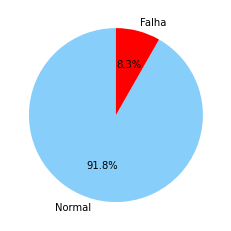

In [ ]:
"""Esse código será a base para comparação com a proporção criada após separação
da base de teste e base de treino."""

df_t = pd.DataFrame(data.Fail.value_counts())

status = ['Normal', 'Falha']

df_t.insert(loc=1,column='status', value=status)

labels = df_t.status
colors = ['lightskyblue', 'red']
plt.pie(df_t['Fail'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [ ]:
"""Separação em TREINO e TESTE"""

seed = 173 # certifica que os dados serão divididos em com o label para teste e treino na mesma proporção.

from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'Fail']    # ENTRADA, Esse trecho de código remove a coluna a ser definida pelo modelo.
Y = data.Fail                              # SAÍDA


"""É nesse trecho de código que é feita a divisão da base de treino e  teste para se fazer a validação do modelo treinado,
e que posteriormente será salvo e dedicado em uma pasta específica para que esteja pronto para produção."""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=seed) 

print('shape input de treino', X_train.shape)
print('shape input de teste', X_test.shape)
print('shape output de treino', Y_train.shape)
print('shape output de teste', Y_test.shape)

shape input de treino (640, 18)
shape input de teste (160, 18)
shape output de treino (640,)
shape output de teste (160,)


In [ ]:
''' OBS: Verificando as proporções dos valores contido no atributo Fail, após a 
utilização de uma seed considerada ideal para criação do modelo de ML. '''

#TREINO
Y_train.value_counts()

False    587
True      53
Name: Fail, dtype: int64

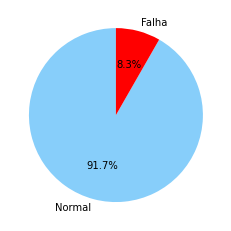

In [ ]:
"""Verificando se a seed utilizada na separação da base de treino e teste está
na proporção ideal para o modelo"""

df_train = pd.DataFrame(Y_train.value_counts())

status = ['Normal', 'Falha']

df_train.insert(loc=1,column='status', value=status)

labels = df_train.status
colors = ['lightskyblue', 'red']
plt.pie(df_train['Fail'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

#### É possível verificar enque a proporção do atributo Fail está bastante similar ao conjunto original de dados, o que nos garante uma boa margem de acurácia durante a criação do modelo classificador.

O mesmos será feito para a base de teste.

In [ ]:
# TESTE
Y_test.value_counts()

False    147
True      13
Name: Fail, dtype: int64

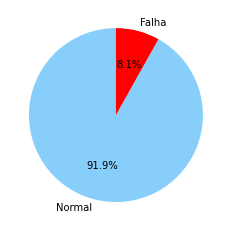

In [ ]:
df_test = pd.DataFrame(Y_test.value_counts())

status = ['Normal', 'Falha']

df_test.insert(loc=1,column='status', value=status)

labels = df_test.status
colors = ['lightskyblue', 'red']
plt.pie(df_test['Fail'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

## <font color = red> ÁRVORE DE DECISÃO

In [ ]:
"""Treinando o modelo"""

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, Y_train);

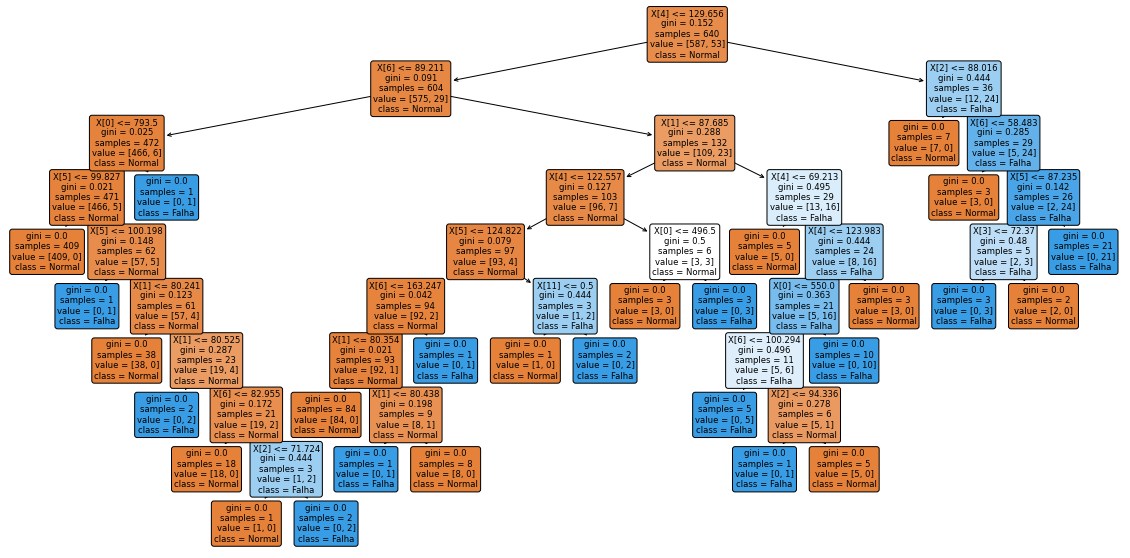

In [ ]:
'''Visualizando a árvore de decisão'''

from sklearn import tree
fig, ax = plt.subplots(figsize=(20,10)) # definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Normal', 'Falha'], filled=True, rounded=True); # plota árvore

In [ ]:
'''Avaliando modelo base de TREINO (ACURÁCIA)'''

model.score(X_train, Y_train)

1.0

In [ ]:
'''Avaliando modelo de TESTE (ACURÁCIA)'''

model.score(X_test, Y_test)

0.95625

### Segunda tentativa (Normalização)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed, min_samples_leaf=12)
model.fit(X_train, Y_train);

In [ ]:
'''Avaliando modelo base de TREINO (ACURÁCIA)'''

model.score(X_train, Y_train)

0.953125

In [ ]:
'''Avaliando modelo de TESTE (ACURÁCIA)'''

model.score(X_test, Y_test)

0.925

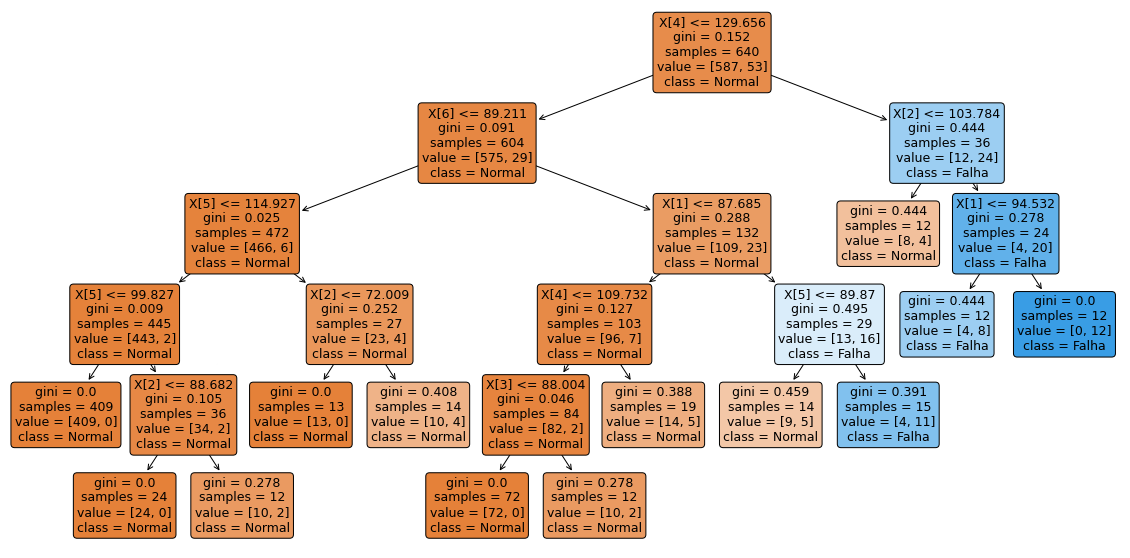

In [ ]:
'''Visualizando a segunda árvore de decisão'''

from sklearn import tree
fig, ax = plt.subplots(figsize=(20,10)) # definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Normal', 'Falha'], filled=True, rounded=True); # plota árvore

### Criando a Matrix de confusão do modelo treinado.

Acurácia:  0.925
Kappa:  0.4597636465953855
F1:  0.4999999999999999


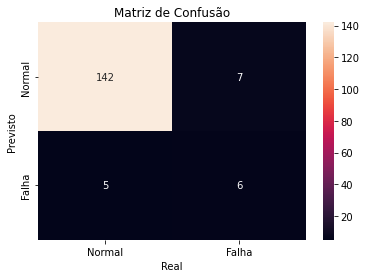

In [ ]:
def predict_and_evaluate(X_test, Y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(Y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(Y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(Y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, Y_test)
    
  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  ax.xaxis.set_ticklabels(['Normal', 'Falha']) 
  ax.yaxis.set_ticklabels(['Normal', 'Falha'])
  plt.show()
    
predict_and_evaluate(X_test, Y_test)

###  GRID SEARCH (ÁRVORE DE DEVISÃO)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation

tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,12], 'min_samples_leaf': [2,3,4,6,8]}]
print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, Y_train)

y_true, y_pred = Y_test, model.predict(X_test)

print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       147
        True       0.69      0.69      0.69        13

    accuracy                           0.95       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.95      0.95      0.95       160




Acurácia:  0.95
Kappa:  0.6650968079539508
F1:  0.6923076923076923


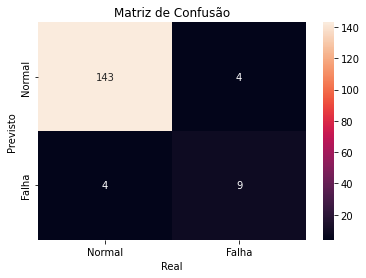

In [ ]:
''' Para usar esse códico, é necessário criar a função que gera a matrix de confusão que está no notebook credito AD.'''

predict_and_evaluate(X_test, Y_test)

### Saving model READY TO USE

In [ ]:
import pickle
pickle.dump(model, open('model_DT.sav', 'wb'))